In [1]:
import sys
from google.colab import drive
drive.mount('/content/gdrive/')
sys.path.append('/content/gdrive/MyDrive/data')

Mounted at /content/gdrive/


In [2]:
SYSPATH = '/content/gdrive/MyDrive/data/' 
STOP_WORDS = SYSPATH + 'stopwords.txt'
import pandas as pd
from collections import defaultdict
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [5]:
content = pd.read_csv(SYSPATH + 'train.csv')
# get sentence length
content['sentence_len'] = content['sentence'].apply(len)

In [6]:
np.max(content['sentence_len'])

38

In [7]:
np.mean(content['sentence_len'])

19.21257222222222

In [8]:
np.std(content['sentence_len'])

3.863787253359747

(array([1.0000e+00, 1.9000e+01, 2.8000e+01, 0.0000e+00, 5.7000e+01,
        1.4500e+02, 0.0000e+00, 3.8700e+02, 6.4300e+02, 0.0000e+00,
        1.5730e+03, 2.3030e+03, 3.7700e+03, 0.0000e+00, 5.5890e+03,
        7.1530e+03, 0.0000e+00, 9.3560e+03, 1.2216e+04, 0.0000e+00,
        1.7374e+04, 1.5749e+04, 1.4456e+04, 0.0000e+00, 1.4936e+04,
        1.7097e+04, 0.0000e+00, 1.7571e+04, 1.7521e+04, 0.0000e+00,
        9.4470e+03, 6.8100e+03, 3.2280e+03, 0.0000e+00, 1.5700e+03,
        6.0600e+02, 0.0000e+00, 2.1400e+02, 8.3000e+01, 0.0000e+00,
        5.0000e+01, 2.4000e+01, 1.3000e+01, 0.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 3. ,  3.7,  4.4,  5.1,  5.8,  6.5,  7.2,  7.9,  8.6,  9.3, 10. ,
        10.7, 11.4, 12.1, 12.8, 13.5, 14.2, 14.9, 15.6, 16.3, 17. , 17.7,
        18.4, 19.1, 19.8, 20.5, 21.2, 21.9, 22.6, 23.3, 24. , 24.7, 25.4,
        26.1, 26.8, 27.5, 28.2, 28.9, 29.6, 30.3, 31. , 31.7, 32.4, 33.1,
        33.8, 34.5, 35

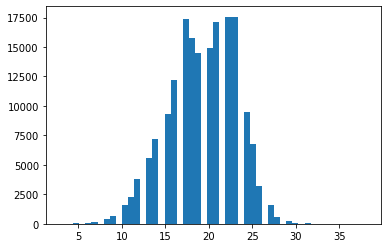

In [9]:
plt.hist(content['sentence_len'], bins=50)

In [10]:
# cut sentence into word
def cut_sentence(sentence): 
  return ' '.join(list(jieba.cut(sentence)))

content['words'] = content['sentence'].apply(lambda sentence: cut_sentence(sentence))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.189 seconds.
Prefix dict has been built successfully.


In [11]:
stop_words =  open(STOP_WORDS, encoding='gbk').read().split()

In [12]:
def remove_stopwords(sentence):
  sentence_remove = []
  for word in sentence.split(' '):
    if word not in stop_words:
      sentence_remove.append(word)
  return ' '.join(sentence_remove)  

In [13]:
content['word_clean'] = content['words'].apply(remove_stopwords)

In [16]:
sentences = content['word_clean'].tolist()
sentences = list(map(lambda s: s.split(), sentences))
from functools import reduce
all_words = reduce(lambda a, b: a + b, sentences)
words_count = Counter(all_words)

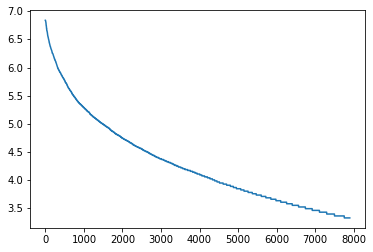

In [17]:
plt.plot(list(map(lambda n: np.log(n), sorted(words_count.values(), reverse=True)[100:8000])))

In [18]:
corpus = content['word_clean'].values
common_word = [w for w, _ in sorted(words_count.items(), key=lambda kv: kv[1], reverse=True)[:100]]

stop_words_size = 100
WORDS_LONG_TAIL_BEGIN = 8000
WORDS_SIZE = WORDS_LONG_TAIL_BEGIN - stop_words_size

tfidf = TfidfVectorizer(max_features=WORDS_SIZE, stop_words=common_word)
text_vectors = tfidf.fit_transform(corpus)
print(text_vectors.shape)

targets = content['label']

x_train, x_test, y_train, y_test = train_test_split(text_vectors, targets, test_size=0.2, random_state=0)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ol'] not in stop_words.
  % sorted(inconsistent)


(180000, 7900)


RandomForestClassifier()

In [19]:
accuracy_score(rf.predict(x_test), y_test)

0.7783888888888889

In [23]:
recall_score(rf.predict(x_test), y_test, average='macro')

0.7804010380344132

In [24]:
precision_score(rf.predict(x_test), y_test, average='macro')

0.7787753779227037

In [25]:
f1_score(rf.predict(x_test), y_test, average='macro')

0.7791232331563027